# HW1 Regression 2024

## Metrics

In a population where the amount of cats is equal to the amount of dogs. Considering the following classification results from a classifier.

| Model A    | Predicted dog | Predicted cat |
|------------|---------------|---------------|
| Actual dog | 30            | 20            |
| Actual cat | 10            | 40            |

### T1. 
What is the accuracy of Model A?

In [7]:
def accuracy(TP , FN , FP , TN) :
    
    return (TP + TN) / (TP + FN + FP + TN)

In [2]:
def precision(TP , FP):
    
    return TP / (TP + FP)

In [3]:
def recall(TP , FN):
    
    return TP / (TP + FN)

In [12]:
def F1(TP , FN , FP):

    return (2 * TP) / (2 * TP + FP + FN)

In [5]:
#Positive Class as Dog and Negative as Cat

TP = 30
FN = 20

FP = 10
TN = 40

In [11]:
print("Accuracy =" , accuracy(TP , FN , FP , TN) , "%")

Accuracy = 0.7 %


### T2. 
Consider class cat as 'class 1' (positive) and dogs as 'class 0' (negative),calculate the precision, recall, and F1

In [10]:
#Positive Class as Cat and Negetive as Dog

TP = 40
FN = 10

FP = 20
TN = 30

In [13]:
print(f"Precision = {precision(TP , FP)}\nRecall = {recall(TP , FN)}\nF1 = {F1(TP , FN , FP)}")

Precision = 0.6666666666666666
Recall = 0.8
F1 = 0.7272727272727273


### T3. 
Consider class cat as ‘class 0’ and class dog as ‘class 1’, calculate the precision, recall, and F1.

In [14]:
TP = 30
FN = 20
FP = 10
TN = 40

In [15]:
print(f"Precision = {precision(TP , FP)}\nRecall = {recall(TP , FN)}\nF1 = {F1(TP , FN , FP)}")

Precision = 0.75
Recall = 0.6
F1 = 0.6666666666666666


### T4. 
Now consider a lopsided population where there are 80% cats. What is the accuracy of Model A? Using dog as the positive class, what is the precision,recall, and F1? Explain how and why these numbers change (or does not change) from the previous questions. 

In [16]:
TP = 12
FN = 8

FP = 16
TN = 64

In [17]:
print("Accuracy =" , accuracy(TP , FN , FP , TN) , "%")

Accuracy = 0.76 %


In [18]:
print(f"Precision = {precision(TP , FP)}\nRecall = {recall(TP , FN)}\nF1 = {F1(TP , FN , FP)}")

Precision = 0.42857142857142855
Recall = 0.6
F1 = 0.5


The accuracy seem higher but got less precision , recall and F1

### OT1. 
Consider the equations for accuracy and F1

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

$$F1 = \frac{2TP}{2TP + FP + FN}$$

When will accuracy be equal, greater, or less than F1?

```
ACC = F1 if TP = TN
ACC > F1 if TN > TP
ACC < F1 if TN < TP
```

## Hello Clustering

Recall from lecture that K-means has two main steps: the points assignment step, and the mean update step. After the initialization of the centroids, we assign each data point to a centroid. Then, each centroids are updated by re-estimating the means.

Concretely, if we are given N data points, $x_1, x_2, ..., x_N$, and we would like to form K clusters. We do the following:
1. **Initialization**: Pick K random data points as K centroid locations $c_1, c_2, ..., c_K$.
2. **Assign**: For each data point k, find the closest centroid. Assign that data point to the centroid. The distance used is typically Euclidean distance.
3. **Update**: For each centroid, calculate the mean from the data points assigned to it.
4. **Repeat**: repeat step 2 and 3 until the centroids stop changing (convergence).

Given the following data points in x-y coordinates (2 dimensional)

| x   | y   |
|-----|-----|
| 1   | 2   |
| 3   | 3   |
| 2   | 2   |
| 8   | 8   |
| 6   | 6   |
| 7   | 7   |
| -3  | -3  |
| -2  | -4  |
| -7  | -7  |

In [22]:
import typing_extensions
import numpy as np
import math

In [49]:
# 1. Define the Point class
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __repr__(self):
        return f"Point({self.x}, {self.y})"

In [50]:
def euclidian_distance(a , b) :
    
    return math.sqrt((a.x - b.x) ** 2 + (a.y - b.y) ** 2)

In [93]:
class K_mean:
    def __init__(self, k: int, points_x: np.array, points_y: np.array):
        self.k = k
        self.points = [Point(points_x[i], points_y[i]) for i in range(len(points_x))]
        self.centroids = []
        self.centroid_of_points = np.zeros(len(self.points), dtype=int)

    def initialization(self):
        random_indices = np.random.choice(len(self.points), self.k, replace=False)
        self.centroids = [self.points[i] for i in random_indices]
        # print("Initial centroids:", self.centroids)
        return

    def assign(self):
        for j, point in enumerate(self.points):
            min_dist = math.inf
            closest_centroid_idx = -1
            for i, centroid in enumerate(self.centroids):
                dist = euclidian_distance(centroid, point)
                if dist < min_dist:
                    min_dist = dist
                    closest_centroid_idx = i
            self.centroid_of_points[j] = closest_centroid_idx
        return

    def update(self):
        new_centroids = []
        for i in range(self.k):
            points_in_cluster = [self.points[idx] for idx, _ in enumerate(self.points) if self.centroid_of_points[idx] == i]

            if len(points_in_cluster) > 0:
                x = sum([p.x for p in points_in_cluster]) / len(points_in_cluster)
                y = sum([p.y for p in points_in_cluster]) / len(points_in_cluster)
                new_centroids.append(Point(x, y))
            else:
                new_centroids.append(self.centroids[i]) # Keep old centroid if empty
        
        self.centroids = new_centroids
        return

    def repeat(self, epoch: int):
        # print("\nStarting K-means iterations...")
        for i in range(epoch):
            # print(f"\n--- Epoch {i+1} ---")
            self.assign()
            self.update()
            # print("Current centroids:", self.centroids)
        # print("\nK-means finished.")

    # --- Cluster Evaluation Functions ---

    def calculate_wcss(self) -> float:
        """
        Calculates the Within-Cluster Sum of Squares (WCSS).
        WCSS measures the sum of squared distances between each point and its assigned centroid.
        Lower WCSS generally indicates better clustering (more compact clusters).
        """
        wcss = 0.0
        for i in range(self.k):
            centroid = self.centroids[i]
            points_in_cluster = [self.points[idx] for idx, _ in enumerate(self.points) if self.centroid_of_points[idx] == i]
            for point in points_in_cluster:
                wcss += euclidian_distance(point, centroid)**2
        return wcss

    def calculate_inertia(self) -> float:
        """
        Calculates the Inertia (similar to WCSS).
        It's the sum of squared distances of samples to their closest cluster center.
        Essentially the same as WCSS, just a different name often used by scikit-learn.
        Lower values are better.
        """
        return self.calculate_wcss() # Inertia is synonymous with WCSS in K-means context

    def calculate_silhouette_score(self) -> float:
        """
        Calculates the Silhouette Score for the clustering.
        The Silhouette Score measures how similar an object is to its own cluster (cohesion)
        compared to other clusters (separation).
        The score ranges from -1 to +1, where:
        +1: The clusters are well separated.
        0: The clusters are indifferent (points are on or very close to the decision boundary).
        -1: Points are assigned to the wrong clusters.

        Requires at least 2 clusters and more than k points for meaningful calculation.
        """
        if self.k < 2:
            return 0.0 # Silhouette score not applicable for single cluster
        if len(self.points) <= self.k:
            return 0.0 # Not enough points to form meaningful silhouette

        silhouette_scores = []
        for i, point_i in enumerate(self.points):
            cluster_i_idx = self.centroid_of_points[i]
            
            # a(i): average distance from point_i to other points in the same cluster
            points_in_same_cluster = [self.points[j] for j, cluster_idx in enumerate(self.centroid_of_points) if cluster_idx == cluster_i_idx and j != i]
            
            if not points_in_same_cluster: # If cluster has only one point
                a_i = 0.0 # Or consider it undefined, or 0 based on definition
            else:
                a_i = sum(euclidian_distance(point_i, p) for p in points_in_same_cluster) / len(points_in_same_cluster)

            # b(i): minimum average distance from point_i to points in a different cluster
            b_i = math.inf
            for other_cluster_idx in range(self.k):
                if other_cluster_idx == cluster_i_idx:
                    continue # Skip current cluster

                points_in_other_cluster = [self.points[j] for j, cluster_idx in enumerate(self.centroid_of_points) if cluster_idx == other_cluster_idx]
                
                if points_in_other_cluster:
                    avg_dist_to_other_cluster = sum(euclidian_distance(point_i, p) for p in points_in_other_cluster) / len(points_in_other_cluster)
                    b_i = min(b_i, avg_dist_to_other_cluster)
            
            if b_i == math.inf: # If no other clusters exist (shouldn't happen with k >= 2)
                silhouette_scores.append(0.0)
                continue

            # Calculate silhouette coefficient for point_i
            if max(a_i, b_i) == 0: # Avoid division by zero if all distances are zero
                s_i = 0.0
            else:
                s_i = (b_i - a_i) / max(a_i, b_i)
            
            silhouette_scores.append(s_i)
        
        if not silhouette_scores:
            return 0.0
        return sum(silhouette_scores) / len(silhouette_scores)

    def calculate_davies_bouldin_index(self) -> float:
        """
        Calculates the Davies-Bouldin Index (DBI).
        DBI is a measure of the ratio of within-cluster scatter to between-cluster separation.
        Lower values indicate better clustering (clusters are more compact and better separated).
        A value of 0 indicates a perfect clustering.
        """
        if self.k < 2:
            return 0.0 # DBI not applicable for single cluster

        # 1. Calculate scatter (S_i) for each cluster
        # S_i = average distance of all points in cluster i to its centroid
        scatter = np.zeros(self.k)
        for i in range(self.k):
            centroid = self.centroids[i]
            points_in_cluster = [self.points[idx] for idx, _ in enumerate(self.points) if self.centroid_of_points[idx] == i]
            
            if points_in_cluster:
                scatter[i] = sum(euclidian_distance(p, centroid) for p in points_in_cluster) / len(points_in_cluster)
            else:
                scatter[i] = 0.0 # Empty cluster has 0 scatter

        # 2. Calculate M_ij (distance between centroids i and j)
        # 3. Calculate R_ij for each pair of clusters
        # R_ij = (S_i + S_j) / M_ij
        
        R_values = []
        for i in range(self.k):
            max_R_i = 0.0
            for j in range(self.k):
                if i == j:
                    continue
                
                M_ij = euclidian_distance(self.centroids[i], self.centroids[j])
                
                if M_ij == 0: # Centroids are at the same location
                    R_ij = math.inf
                else:
                    R_ij = (scatter[i] + scatter[j]) / M_ij
                
                max_R_i = max(max_R_i, R_ij)
            R_values.append(max_R_i)
        
        if not R_values: # Should not happen if k >= 2
            return 0.0
        
        # DBI is the average of max_R_i for each cluster
        return sum(R_values) / self.k

In [94]:
k = 4
points_x = np.array([1, 3, 2, 8, 6, 7, -3, -2, -7])
points_y = np.array([2, 3, 2, 8 ,6 ,7, -3, -4, -7])

In [95]:
k_mean = K_mean(k=k , points_x=points_x , points_y=points_y)

In [96]:
k_mean.initialization()
k_mean.repeat(10)

In [97]:
import matplotlib.pyplot as plt

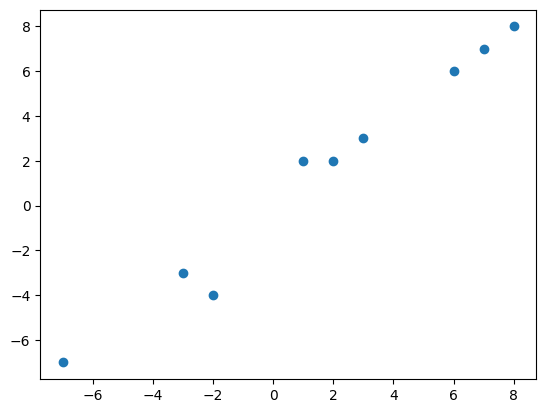

In [98]:
plt.scatter(points_x , points_y)
plt.show()

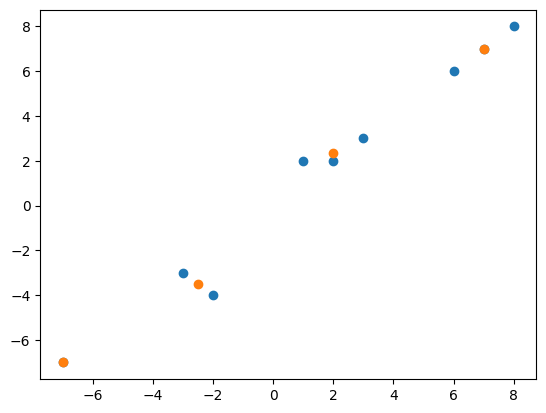

In [99]:
plt.scatter(points_x , points_y)
plt.scatter([p.x for p in k_mean.centroids ] , [p.y for p in k_mean.centroids ])
plt.show()

### T5. 
If the starting points are (3,3), (2,2), and (-3,-3). Describe each
assign and update step. What are the points assigned? What are the updated
centroids? You may do this calculation by hand or write a program to do it.

In [112]:
k_mean = K_mean(k=3 , points_x=points_x , points_y=points_y)
k_mean.centroids = [Point(3, 3), Point(2, 2), Point(-3, -3)]

In [113]:
k_mean.repeat(3)

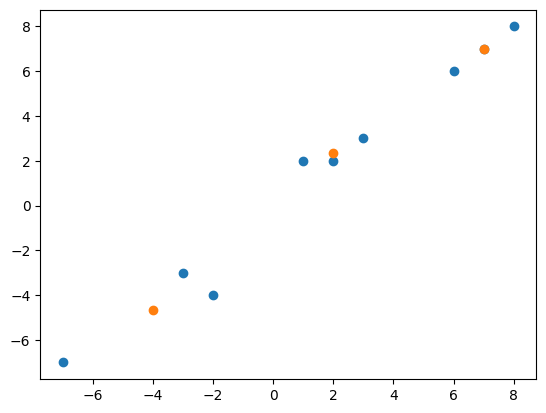

In [114]:
plt.scatter(points_x , points_y)
plt.scatter([p.x for p in k_mean.centroids ] , [p.y for p in k_mean.centroids ])
plt.show()

In [115]:
print(f"WCSS = {k_mean.calculate_wcss()}\nInertia = {k_mean.calculate_inertia()}\nSilhouette = {k_mean.calculate_silhouette_score()}\nDavies Bouldin Index = {k_mean.calculate_davies_bouldin_index()}")

WCSS = 29.333333333333336
Inertia = 29.333333333333336
Silhouette = 0.6708113719634965
Davies Bouldin Index = 0.3396944661313798


### T6. 
If the starting points are (-3,-3), (2,2), and (-7,-7), what happens?

In [116]:
k_mean = K_mean(k=3 , points_x=points_x , points_y=points_y)
k_mean.centroids = [Point(-3, -3), Point(2, 2), Point(-7, -7)]

In [117]:
k_mean.repeat(3)

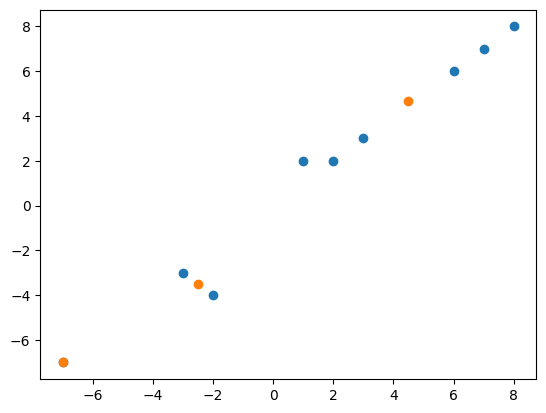

In [118]:
plt.scatter(points_x , points_y)
plt.scatter([p.x for p in k_mean.centroids ] , [p.y for p in k_mean.centroids ])
plt.show()

In [119]:
print(f"WCSS = {k_mean.calculate_wcss()}\nInertia = {k_mean.calculate_inertia()}\nSilhouette = {k_mean.calculate_silhouette_score()}\nDavies Bouldin Index = {k_mean.calculate_davies_bouldin_index()}")

WCSS = 77.83333333333333
Inertia = 77.83333333333333
Silhouette = 0.6139577219913521
Davies Bouldin Index = 0.32590510855521587


one of these groups seem too large and one of them contain only one point

### T7.
Between the two starting set of points in the previous two questions,
which one do you think is better? How would you measure the ‘goodness’ quality
of a set of starting points?
In general, it is important to try different sets of starting points when doing
k-means

I think the first one is better measured by WCSS , Inertia , Silhouette , Davies Bouldin index

### OT2. 
What would be the best K for this question? Describe your reasoning.

In [127]:
for k in range(3 , 10) :
    print(f"k = {k}")
    k_mean = K_mean(k=k , points_x=points_x , points_y=points_y)
    k_mean.initialization()
    k_mean.repeat(3)
    print(f"WCSS = {k_mean.calculate_wcss()}\nInertia = {k_mean.calculate_inertia()}\nSilhouette = {k_mean.calculate_silhouette_score()}\nDavies Bouldin Index = {k_mean.calculate_davies_bouldin_index()}")

k = 3
WCSS = 77.83333333333333
Inertia = 77.83333333333333
Silhouette = 0.6139577219913521
Davies Bouldin Index = 0.32590510855521587
k = 4
WCSS = 27.166666666666664
Inertia = 27.166666666666664
Silhouette = 0.5873992854411949
Davies Bouldin Index = 0.3052017885566939
k = 5
WCSS = 26.666666666666664
Inertia = 26.666666666666664
Silhouette = 0.7089793815272236
Davies Bouldin Index = 0.27883778119904007
k = 6
WCSS = 3.0000000000000004
Inertia = 3.0000000000000004
Silhouette = 0.5646795137907266
Davies Bouldin Index = 0.31103334739013805
k = 7
WCSS = 4.000000000000001
Inertia = 4.000000000000001
Silhouette = 0.8833333333333333
Davies Bouldin Index = 0.1097146459556769
k = 8
WCSS = 1.0000000000000002
Inertia = 1.0000000000000002
Silhouette = 0.9452738194404076
Davies Bouldin Index = 0.08623739930594364
k = 9
WCSS = 0.0
Inertia = 0.0
Silhouette = 0.0
Davies Bouldin Index = 0.0


Maybe 5 ?

## My heart will go on

In this part of the exercise we will work on the Titanic dataset provided by
Kaggle. The Titanic dataset contains information of the passengers boarding
the Titanic on its final voyage. We will work on predicting whether a given
passenger will survive the trip.
Let’s launch Jupyter and start coding!
We start by importing the data using Pandas

In [128]:
import pandas as pd

In [129]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url) #training set
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url) #test set

In [130]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [132]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### T8. 
What is the median age of the training set? You can easily modify
the age in the dataframe by

In [ ]:
train["Age"] = train["Age"].fillna(train["Age"].median())
train["Pclass"] = train["Pclass"].fillna(train["Pclass"].mode())


In [146]:
test["Age"] = test["Age"].fillna(test["Age"].median())
test["Pclass"] = test["Pclass"].fillna(test["Pclass"].mode())

### T9. 
Some fields like ‘Embarked’ are categorical. They need to be converted
to numbers first. We will represent S with 0, C with 1, and Q with 2. What is
the mode of Embarked? Fill the missing values with the mode. You can set the
value of Embarked easily with the following command.

In [135]:
train.loc[train["Embarked"] == "S", "Embarked"] = 0
train.loc[train["Embarked"] == "C", "Embarked"] = 1
train.loc[train["Embarked"] == "Q", "Embarked"] = 2

train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

In [147]:
test.loc[test["Embarked"] == "S", "Embarked"] = 0
test.loc[test["Embarked"] == "C", "Embarked"] = 1
test.loc[test["Embarked"] == "Q", "Embarked"] = 2

test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

### T10. 
Write a logistic regression classifier using gradient descent as learned
in class. Use PClass, Sex, Age, and Embarked as input features. You can
extract the features from Pandas to Numpy by


In [149]:
data = np.array(train[["Pclass","Sex","Age","Embarked"]].values, dtype = float)
test_data = np.array(test[["Pclass","Sex","Age","Embarked"]].values , dtype = float)

In [ ]:
import numpy as np

class LogisticRegression:

    def __init__(self, learning_rate: float = 0.01):
        
        self.learning_rate = learning_rate

        self.weights = None  # Stores the learned feature coefficients
        self.bias = None     # Stores the learned intercept term

    def _sigmoid(self, z: np.ndarray) -> np.ndarray:

        return 1 / (1 + np.exp(-z))

    def fit(self, X: np.ndarray, y: np.ndarray):

        n_samples, n_features = X.shape

        # Initialize weights and bias to random
        # Weights correspond to the number of features
        self.weights = np.random.rand(n_features)
        # Bias is a single scalar value
        self.bias = np.random.rand(1)

        # Gradient Descent loop for optimization
        for _ in range(self.n_iterations):

            linear_model_output = np.dot(X, self.weights) + self.bias
            
            predicted_probabilities = self._sigmoid(linear_model_output)
            
            d_weights = (1 / n_samples) * np.dot(X.T, (predicted_probabilities - y))
            d_bias = (1 / n_samples) * np.sum(predicted_probabilities - y)

            self.weights -= self.learning_rate * d_weights
            self.bias -= self.learning_rate * d_bias

            

    def predict(self, X: np.ndarray, threshold: float = 0.5) -> np.ndarray:

        if not 0 <= threshold <= 1:
            raise ValueError("Threshold must be between 0 and 1.")

        probabilities = self.predict_proba(X)
        predictions = (probabilities >= threshold).astype(int)
        
        return predictions

In [203]:
model = LogisticRegression()

In [204]:
model.fit(data , np.array(train['Survived'] , dtype = float))